In [ ]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('ciudades_NL.csv')

In [ ]:
class municipio:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distancia(self, municipio):
        xDis = abs(self.x - municipio.x)
        yDis = abs(self.y - municipio.y)
        distancia = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distancia
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [ ]:
listaMunicipios = []

for i in range(0,len(df)):
    listaMunicipios.append(municipio(x=df.Longitud[i], y=df.Latitud[i]))

#vista previa de la informacion de las ubiciones de los municipios
listaMunicipios[0:5]

[(-100.13348,27.24213),
 (-100.18331,25.77748),
 (-100.50158,26.52964),
 (-99.98486,25.35912),
 (-99.23533,25.70782)]

In [ ]:
class Aptitud:
    def __init__(self, ruta):
        self.ruta = ruta
        self.distancia = 0
        self.aptitud= 0.0
    
    def distanciaRuta(self):
        if self.distancia ==0:
            distanciaRelativa = 0
            for i in range(0, len(self.ruta)):
                puntoInicial = self.ruta[i]
                puntoFinal = None
                if i + 1 < len(self.ruta):
                    puntoFinal = self.ruta[i + 1]
                else:
                    puntoFinal = self.ruta[0]
                distanciaRelativa += puntoInicial.distancia(puntoFinal)
            self.distancia = distanciaRelativa
        return self.distancia
    
    def rutaApta(self):
        if self.aptitud == 0:
            self.aptitud = 1 / float(self.distanciaRuta())
        return self.aptitud

In [ ]:
def crearRuta(listaMunicipios):
    route = random.sample(listaMunicipios, len(listaMunicipios))
    return route

In [ ]:
def poblacionInicial(tamanoPob,listaMunicipios):
    poblacion = []

    for i in range(0, tamanoPob):
        poblacion.append(crearRuta(listaMunicipios))
    return poblacion

In [ ]:
def clasificacionRutas(poblacion):
    fitnessResults = {}
    for i in range(0,len(poblacion)):
        fitnessResults[i] = Aptitud(poblacion[i]).rutaApta()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [ ]:
def seleccionRutas(popRanked, indivSelecionados):
    resultadosSeleccion = []
    df = pd.DataFrame(np.array(popRanked), columns=["Indice","Aptitud"])
    df['cum_sum'] = df.Aptitud.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Aptitud.sum()
    
    for i in range(0, indivSelecionados):
        resultadosSeleccion.append(popRanked[i][0])
    for i in range(0, len(popRanked) - indivSelecionados):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                resultadosSeleccion.append(popRanked[i][0])
                break
    return resultadosSeleccion

In [ ]:
def grupoApareamiento(poblacion, resultadosSeleccion):
    grupoApareamiento = []
    for i in range(0, len(resultadosSeleccion)):
        index = resultadosSeleccion[i]
        grupoApareamiento.append(poblacion[index])
    return grupoApareamiento

In [ ]:
def reproduccion(progenitor1, progenitor2):
    hijo = []
    hijoP1 = []
    hijoP2 = []
    
    geneA = int(random.random() * len(progenitor1))
    geneB = int(random.random() * len(progenitor2))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        hijoP1.append(progenitor1[i])
        
    hijoP2 = [item for item in progenitor2 if item not in hijoP1]

    hijo = hijoP1 + hijoP2
    return hijo

In [ ]:
def reproduccionPoblacion(grupoApareamiento, indivSelecionados):
    hijos = []
    tamano = len(grupoApareamiento) - indivSelecionados
    espacio = random.sample(grupoApareamiento, len(grupoApareamiento))

    for i in range(0,indivSelecionados):
        hijos.append(grupoApareamiento[i])
    
    for i in range(0, tamano):
        hijo = reproduccion(espacio[i], espacio[len(grupoApareamiento)-i-1])
        hijos.append(hijo)
    return hijos

In [ ]:
def mutacion(individuo, razonMutacion):
    for swapped in range(len(individuo)):
        if(random.random() < razonMutacion):
            swapWith = int(random.random() * len(individuo))
            
            lugar1 = individuo[swapped]
            lugar2 = individuo[swapWith]
            
            individuo[swapped] = lugar2
            individuo[swapWith] = lugar1
    return individuo

In [ ]:
def mutacionPoblacion(poblacion, razonMutacion):
    pobMutada = []
    
    for ind in range(0, len(poblacion)):
        individuoMutar = mutacion(poblacion[ind], razonMutacion)
        pobMutada.append(individuoMutar)
    return pobMutada

In [ ]:
def nuevaGeneracion(generacionActual, indivSelecionados, razonMutacion):

    #clasificar rutas 
    popRanked = clasificacionRutas(generacionActual)

    #seleccion de los candidatos
    selectionResults = seleccionRutas(popRanked, indivSelecionados)

    #generar grupo de apareamiento
    grupoApa = grupoApareamiento(generacionActual, selectionResults)

    #generacion de la poblacion cruzada, reproducida
    hijos = reproduccionPoblacion(grupoApa, indivSelecionados)

    #incluir las mutaciones en la nueva generacion  
    nextGeneration = mutacionPoblacion(hijos, razonMutacion)

    return nextGeneration

In [ ]:
def algoritmoGenetico(poblacion, tamanoPoblacion, indivSelecionados, razonMutacion, generaciones):
    pop = poblacionInicial(tamanoPoblacion, poblacion)
    print("Distancia Inicial: " + str(1 / clasificacionRutas(pop)[0][1]))
    
    for i in range(0, generaciones):
        pop = nuevaGeneracion(pop, indivSelecionados, razonMutacion)
    
    print("Distancia Final: " + str(1 / clasificacionRutas(pop)[0][1]))
    bestRouteIndex = clasificacionRutas(pop)[0][0]
    mejorRuta = pop[bestRouteIndex]
    return mejorRuta

In [ ]:
algoritmoGenetico(poblacion=listaMunicipios, 
                  tamanoPoblacion=100, 
                  indivSelecionados=20,
                  razonMutacion=0.01, 
                  generaciones=500)

Distancia Inicial: 26.12396628773913
Distancia Final: 11.39498287008981


[(-99.30001,25.93087),
 (-99.72727,26.89334),
 (-100.13348,27.24213),
 (-100.50158,26.52964),
 (-100.29422,25.96389),
 (-100.01539,25.82498),
 (-100.08096,25.73643),
 (-100.18331,25.77748),
 (-100.3137,25.67693),
 (-100.4027,25.66317),
 (-100.59792,25.80892),
 (-100.53826,26.00029),
 (-100.39146,25.80246),
 (-100.31738,25.80403),
 (-100.29475,25.74701),
 (-100.16528,25.95821),
 (-99.94216,25.85854),
 (-99.73194,25.60528),
 (-99.68457,25.25653),
 (-99.98486,25.35912),
 (-100.00685,25.26588),
 (-100.10858,25.02443),
 (-100.23333,24.93333),
 (-100.15,23.83333),
 (-100.21399,23.45006),
 (-99.68333,24.85),
 (-99.47221,24.72459),
 (-99.01667,25.1),
 (-99.23533,25.70782),
 (-99.17581,25.87928)]

In [ ]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = poblacionInicial(popSize, population)
    progress = []
    progress.append(1 / clasificacionRutas(pop)[0][1])
    
    for i in range(0, generations):
        pop = nuevaGeneracion(pop, eliteSize, mutationRate)
        progress.append(1 / clasificacionRutas(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distancia')
    plt.xlabel('Generacion')
    plt.show()

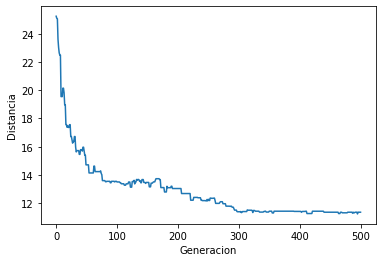

In [ ]:
geneticAlgorithmPlot(population=listaMunicipios, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)